# 1. 데이터: 신용 불량탐지 모델 데이터 셋
- 이용자의 재무적 정보를 토대로 미래의 신용 불량 여부를 탐지하기 위한 데이터 셋
- 신용 불량인 경우가 적기 때문에 class의 분포가 불균형한 것이 특징

In [ ]:
!git clone https://github.com/kc9410/Model_Evaluation.git

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, confusion_matrix, classification_report

In [130]:
df = pd.read_csv('/content/Model_Evaluation/data/creditcard_dataset.csv')

In [4]:
df.shape

(15252, 31)

0    14760
1      492
Name: Class, dtype: int64


<AxesSubplot:>

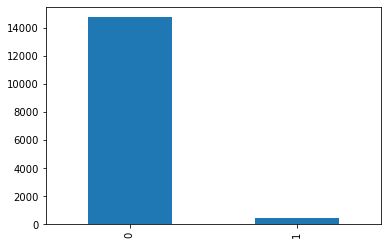

In [5]:
print(df.iloc[:,-1].value_counts())
df.iloc[:,-1].value_counts().plot(kind='bar')

In [6]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
df=df.drop('Time',axis=1)

# 2. MLP 모델 학습 및 평가
- MLP 모델을 활용하여 불균형 데이터 셋인 신용 불량탐지 데이터 셋을 학습함
- 불균형 데이터 셋에 대한 평가 지표들을 통해 MLP 모델의 성능을 측정함

In [8]:
# 필요 라이브러리 load
from sklearn.model_selection import train_test_split

In [9]:
def metrics(y_test, pred):
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_score = roc_auc_score(y_test, pred, average='macro')
    print('정확도 : {0:.5f}, 정밀도 : {1:.5f}, 재현율 : {2:.5f}'.format(accuracy, precision, recall))
    print('f1-score : {0:.2f}, auc : {1:.2f}'.format(f1, roc_score))
    
    return accuracy, precision, recall, f1, roc_score 

In [10]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [11]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# 크기 출력
print("학습 데이터 input: ", x_train.shape)
print("평가 데이터 input: ", x_test.shape)
print("학습 데이터 output: ", y_train.shape)
print("평가 데이터 output: ", y_test.shape)

학습 데이터 input:  (11439, 29)
평가 데이터 input:  (3813, 29)
학습 데이터 output:  (11439,)
평가 데이터 output:  (3813,)


In [12]:
mlp = MLPClassifier(solver='adam', random_state=0, learning_rate_init=0.01, hidden_layer_sizes=[1])
mlp.fit(x_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=[1], learning_rate='constant',
              learning_rate_init=0.01, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=0, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [13]:
pred = mlp.predict(x_test)
accuracy, precision, recall, f1, roc_score = metrics(y_test,pred)
print(confusion_matrix(y_test,pred))

정확도 : 0.99161, 정밀도 : 0.86885, 재현율 : 0.86885
f1-score : 0.87, auc : 0.93
[[3675   16]
 [  16  106]]


### 상황별 대표 분류 평가 지표 선택 가이드라인

![image.png](https://ifh.cc/g/9NQdzJ.jpg)

In [14]:
def BCR(cm) :
    
    BCR = np.sqrt( (cm[1,1]/(cm[1,1]+cm[1,0])) * (cm[0,0]/(cm[0,0]+cm[0,1]))  )

    return BCR

In [15]:
print('ACC 성능 :{} , F1 성능 : {}, BCR 성능 : {}'.format(accuracy, f1,BCR(confusion_matrix(y_test,pred))))

ACC 성능 :0.991607658012064 , F1 성능 : 0.8688524590163934, BCR 성능 : 0.9301000471854534


### 오분류 비용
- 많은 문제에서 각 class별 중요도가 다를 수 있으므로 특정 범주에 대한 정확도를 높이는 것이 중요할 수 있음
- 따라서 각 class에 대한 오분류 비용을 산정하여 비용에 따른 모델의 성능을 측정할 수 있음

![image.png](https://ifh.cc/g/foMkgO.jpg)

In [16]:
naive_pred = [0]*len(y_test)

In [17]:
naive_cm = confusion_matrix(y_test,naive_pred)
print(naive_cm)

[[3691    0]
 [ 122    0]]


In [18]:
mlp_cm = confusion_matrix(y_test,pred)
print(mlp_cm)

[[3675   16]
 [  16  106]]


In [19]:
weight_cost_matrix = np.array([[100,-100],[-10000,1000]])
weight_cost_matrix

array([[   100,   -100],
       [-10000,   1000]])

In [20]:
navie_cost = np.sum(naive_cm*weight_cost_matrix)
print(navie_cost)

-850900


In [21]:
mlp_cost = np.sum(mlp_cm*weight_cost_matrix)
print(mlp_cost)

311900


In [22]:
print("모델 효용:",mlp_cost-navie_cost)

모델 효용: 1162800


# 3. MLP 모델 학습: Hidden Layer & Hidden Node Tunning
- MLP 모델을 학습할 때, hidden layer와 node의 개수는 모델의 복잡도를 결정함
- 따라서 적절한 hidden layer와 hidden node를 탐색하여 모델의 성능을 향상시킬 수 있음

In [23]:
parameter_space = {
    'hidden_layer_sizes': [(1),(10),(100),(10,10),(10,10,10)]
}

In [24]:
from sklearn.model_selection import GridSearchCV

In [25]:
mlp = MLPClassifier(solver='adam', random_state=0, learning_rate_init=0.01)
clf = GridSearchCV(mlp, parameter_space, n_jobs=-1,scoring ="f1") #f1, accuracy, recall, precision
clf.fit(x_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.01, max_fun=15000,
                                     max_iter=200, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state=0, shuffle=True,
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'h

In [26]:
print('Best parameters found:\n', clf.best_params_)

Best parameters found:
 {'hidden_layer_sizes': 100}


In [27]:
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

0.881 (+/-0.048) for {'hidden_layer_sizes': 1}
0.903 (+/-0.052) for {'hidden_layer_sizes': 10}
0.911 (+/-0.040) for {'hidden_layer_sizes': 100}
0.906 (+/-0.036) for {'hidden_layer_sizes': (10, 10)}
0.900 (+/-0.091) for {'hidden_layer_sizes': (10, 10, 10)}


In [28]:
pred = clf.predict(x_test)
accuracy, precision, recall, f1, roc_score = metrics(y_test,pred)
print(confusion_matrix(y_test,pred))

정확도 : 0.99397, 정밀도 : 0.93805, 재현율 : 0.86885
f1-score : 0.90, auc : 0.93
[[3684    7]
 [  16  106]]


In [29]:
print('ACC 성능 :{} , F1 성능 : {}, BCR 성능 : {}'.format(accuracy, f1,BCR(confusion_matrix(y_test,pred))))

ACC 성능 :0.993968004196171 , F1 성능 : 0.902127659574468, BCR 성능 : 0.931238248770428


In [30]:
mlp_cm = confusion_matrix(y_test,pred)
search_mlp_cost = np.sum(mlp_cm*weight_cost_matrix)
print(search_mlp_cost)

313700


In [31]:
print("모델 이익 증가:",search_mlp_cost-mlp_cost)

모델 이익 증가: 1800
